In [1]:
import sys
from pathlib import Path

import rich
import yaml

run_id = "9ruj4euu"
run_dir = Path(
    f"/net/csefiles/coc-fung-cluster/nima/shared/experiment-data/lltrainer/{run_id}/"
)
assert (
    run_dir.exists() and run_dir.is_dir()
), f"run_dir: {run_dir} does not exist or is not a directory"
print(run_dir)


def _load_python_path(run_dir: Path):
    if (hparams_path := next((run_dir / "log").glob("**/hparams.yaml"), None)) is None:
        raise FileNotFoundError(f"Could not find hparams.yaml in {run_dir}")

    config = yaml.unsafe_load(hparams_path.read_text())
    global python_path
    python_path = config.get("environment", {}).get("python_path", [])

    # Find the ll_snapshot if it exists
    if (
        snapshot_path := next(
            (
                path
                for path in config.get("environment", {}).get("python_path", [])
                if path.stem == "ll_snapshot" and path.is_dir()
            ),
            None,
        )
    ) is None:
        return

    # Add it to the current python path
    snapshot_path = str(snapshot_path.absolute())
    print(f"Added {snapshot_path} to the beginning of PYTHONPATH")
    sys.path.insert(0, snapshot_path)


_load_python_path(run_dir)

/net/csefiles/coc-fung-cluster/nima/shared/experiment-data/lltrainer/9ruj4euu
Added /net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/d3d7a9bc-1d02-4b0c-bca4-50cda967f9c6/ll_snapshot to the beginning of PYTHONPATH


In [2]:
import os

os.environ["LL_DISABLE_TYPECHECKING"] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "2"


import ll
import torch

ll.pretty()

torch.no_grad().__enter__()
torch.inference_mode().__enter__()

TensorBoard/TensorBoardX not found. Disabling TensorBoardLogger. Please install TensorBoard with `pip install tensorboard` or TensorBoardX with `pip install tensorboardx` to enable TensorBoard logging.


In [3]:
from pathlib import Path

run_id = "9ruj4euu"
ckpt_path = run_dir / "checkpoint" / "last.ckpt"
# If the file is a symlink, get the target
if ckpt_path.is_symlink():
    print(f"Symlink found {ckpt_path} => {ckpt_path.resolve()}")
    ckpt_path = ckpt_path.resolve()

ckpt_path

Symlink found /net/csefiles/coc-fung-cluster/nima/shared/experiment-data/lltrainer/9ruj4euu/checkpoint/last.ckpt => /net/csefiles/coc-fung-cluster/nima/shared/experiment-data/lltrainer/9ruj4euu/checkpoint/epoch=64-step=941720-val_matbench_discovery_force_mae=0.0316648855805397.ckpt


Path('/net/csefiles/coc-fung-cluster/nima/shared/experiment-data/lltrainer/9ruj4euu/checkpoint/epoch=64-step=941720-val_matbench_discovery_force_mae=0.0316648855805397.ckpt')

In [4]:
from jmppeft.tasks.finetune.base import FinetuneMatBenchDiscoveryIS2REDatasetConfig

dataset_config = FinetuneMatBenchDiscoveryIS2REDatasetConfig(
    # sample_n=DatasetSampleNConfig(sample_n=16, seed=42)
)
print(dataset_config)

dataset_og = dataset_config.create_dataset()
dataset_og, len(dataset_og)

[15:41:39] CRITICAL Type checking is disabled due to the environment variable                       ]8;id=198229;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/ll/src/ll/typecheck.py\typecheck.py]8;;\:]8;id=723651;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/ll/src/ll/typecheck.py#55\55]8;;\
                    LL_DISABLE_TYPECHECKING.                                                                       

[15:41:40] INFO     PyTorch version 2.2.2 available.                                                   ]8;id=364838;file:///net/csefiles/coc-fung-cluster/nima/miniforge3/envs/jmp-peft/lib/python3.11/site-packages/datasets/config.py\config.py]8;;\:]8;id=180867;file:///net/csefiles/coc-fung-cluster/nima/miniforge3/envs/jmp-peft/lib/python3.11/site-packages/datasets/config.py#58\58]8;;\


Loading 'wbm_summary' from cached file at '/nethome/nsg6/.cache/matbench-discovery/1.0.0/wbm/2023-12-13-wbm-summary.csv.gz'


(<jmppeft.datasets.mpd_is2re.MatBenchDiscoveryIS2REDataset at 0x7f8928dc6090>,
 256963)

In [5]:
from jmppeft.tasks.finetune import matbench_discovery as M

# def _update_dataset_(dataset_config):
#     energy_column_mapping = {}
#     if (energy_column := dataset_config.pop("energy_column", None)) is not None:
#         energy_column_mapping["y"] = energy_column
#     if (
#         relaxed_energy_column := dataset_config.pop("relaxed_energy_column", None)
#     ) is not None:
#         energy_column_mapping["y_relaxed"] = relaxed_energy_column
#     dataset_config["energy_column_mapping"] = energy_column_mapping


# hparams = torch.load(ckpt_path)["hyper_parameters"]
# _update_dataset_(hparams["train_dataset"])
# _update_dataset_(hparams["val_dataset"])
# _update_dataset_(hparams["test_dataset"])

default_dtype = torch.float32
model: M.MatbenchDiscoveryModel = M.MatbenchDiscoveryModel.load_checkpoint(
    ckpt_path,
    # hparams=hparams,
    map_location="cuda",
)
model = model.to(default_dtype)
model

[15:42:10] CRITICAL Using regular backbone                                                              ]8;id=643484;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/d3d7a9bc-1d02-4b0c-bca4-50cda967f9c6/ll_snapshot/jmppeft/tasks/finetune/base.py\base.py]8;;\:]8;id=376071;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/d3d7a9bc-1d02-4b0c-bca4-50cda967f9c6/ll_snapshot/jmppeft/tasks/finetune/base.py#605\605]8;;\

Unrecognized arguments:  dict_keys(['name', 'learnable_rbf', 'learnable_rbf_stds', 'unique_basis_per_layer', 'dropout', 'edge_dropout', 'ln_per_layer', 'scale_factor_to_ln'])


           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=703210;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/d3d7a9bc-1d02-4b0c-bca4-50cda967f9c6/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=653643;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/d3d7a9bc-1d02-4b0c-bca4-50cda967f9c6/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=749410;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/d3d7a9bc-1d02-4b0c-bca4-50cda967f9c6/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=790992;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/d3d7a9bc-1d02-4b0c-bca4-50cda967f9c6/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=719454;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/d3d7a9bc-1d02-4b0c-bca4-50cda967f9c6/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=843233;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/d3d7a9bc-1d02-4b0c-bca4-50cda967f9c6/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=203191;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/d3d7a9bc-1d02-4b0c-bca4-50cda967f9c6/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=496176;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/d3d7a9bc-1d02-4b0c-bca4-50cda967f9c6/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=940756;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/d3d7a9bc-1d02-4b0c-bca4-50cda967f9c6/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=534587;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/d3d7a9bc-1d02-4b0c-bca4-50cda967f9c6/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=756136;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/d3d7a9bc-1d02-4b0c-bca4-50cda967f9c6/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=832484;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/d3d7a9bc-1d02-4b0c-bca4-50cda967f9c6/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=733798;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/d3d7a9bc-1d02-4b0c-bca4-50cda967f9c6/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=87582;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/d3d7a9bc-1d02-4b0c-bca4-50cda967f9c6/ll_snapshot/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

[15:42:13] CRITICAL Constructed backbone with dlora=None                                                ]8;id=866736;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/d3d7a9bc-1d02-4b0c-bca4-50cda967f9c6/ll_snapshot/jmppeft/tasks/finetune/base.py\base.py]8;;\:]8;id=641575;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/d3d7a9bc-1d02-4b0c-bca4-50cda967f9c6/ll_snapshot/jmppeft/tasks/finetune/base.py#616\616]8;;\

           INFO     Registered 12 shared parameters                                         ]8;id=584122;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/ll/src/ll/model/modules/shared_parameters.py\shared_parameters.py]8;;\:]8;id=806873;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/ll/src/ll/model/modules/shared_parameters.py#72\72]8;;\

           INFO     List of ignored parameters: []                                                      ]8;id=53122;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/d3d7a9bc-1d02-4b0c-bca4-50cda967f9c6/ll_snapshot/jmppeft/tasks/finetune/base.py\base.py]8;;\:]8;id=701782;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/d3d7a9bc-1d02-4b0c-bca4-50cda967f9c6/ll_snapshot/jmppeft/tasks/finetune/base.py#694\694]8;;\

           CRITICAL Freezing 0 parameters (0.00%) out of 40,983,796 total parameters (40,983,796        ]8;id=632266;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/d3d7a9bc-1d02-4b0c-bca4-50cda967f9c6/ll_snapshot/jmppeft/tasks/finetune/base.py\base.py]8;;\:]8;id=698211;file:///net/csefiles/coc-fung-cluster/nima/shared/experiment-data/llrunner/d3d7a9bc-1d02-4b0c-bca4-50cda967f9c6/ll_snapshot/jmppeft/tasks/finetune/base.py#923\923]8;;\
                    trainable)                                                                                     

MatbenchDiscoveryModel(config=MatbenchDiscoveryConfig(name=mptrj-jmps-direct-bsz100, project=jmp_mptrj), device=cuda:0)

In [6]:
from collections import Counter

import jmppeft.modules.dataset.dataset_transform as DT
import torch.utils._pytree as tree
from lightning.fabric.utilities.apply_func import move_data_to_device
from torch_geometric.data import Batch, Data


def data_transform(data: Data):
    data = model.data_transform(data)
    data = Data.from_dict(
        tree.tree_map(
            lambda x: x.type(default_dtype)
            if torch.is_tensor(x) and torch.is_floating_point(x)
            else x,
            data.to_dict(),
        )
    )
    return data


def composition(data: Batch):
    return dict(Counter(data.atomic_numbers.tolist()))


num_items = 1024

dataset = DT.transform(dataset_og, data_transform)
dataset = DT.sample_n_transform(dataset, n=num_items, seed=42)


idx = 32
data = Batch.from_data_list([dataset[idx]])
rich.print(data.to_dict(), composition(data))

{
    'pos': tensor[11, 3] n=33 x∈[-4.287, 6.937] μ=1.412 σ=2.423,
    'id': ['wbm-3-72883'],
    'atomic_numbers': tensor[11] i64 x∈[50, 79] μ=62.000 σ=14.269,
    'cell': tensor[1, 3, 3] n=9 x∈[-3.509, 6.938] μ=1.065 σ=4.112 [[[6.029, 0., -3.509], [-2.037, 5.674, -3.509], 
[0., 0., 6.938]]],
    'y_formation': tensor[1] [-0.236],
    'y_formation_correction': tensor[1] [0.],
    'y_above_hull': tensor[1] [0.093],
    'natoms': tensor[1] i64 [11],
    'tags': tensor[11] i64 x∈[2, 2] μ=2.000 σ=0.,
    'fixed': tensor[11] bool all_zeros,
    'batch': tensor[11] i64 all_zeros,
    'ptr': tensor[2] i64 μ=5.500 σ=7.778 [0, 11]
}
{66: 1, 50: 6, 79: 4}

In [7]:
from jmppeft.modules.relaxer import ModelOutput, Relaxer
from matbench_discovery.energy import get_e_form_per_atom

USE_Y_RELAXED = False


def model_fn(data, initial_data, *, use_y_relaxed: bool = USE_Y_RELAXED) -> ModelOutput:
    model_out = model.forward_denormalized(data)

    energy = model_out["y_relaxed"] if use_y_relaxed else model_out["y"]
    # energy = model_out["y"]
    # relaxed_energy = model_out["y_relaxed"]
    forces = model_out["force"]
    stress = model_out["stress"]

    # JMP-S v2 energy is corrected_energy, i.e., DFT total energy
    # This energy is now DFT total energy, we need to convert it to formation energy per atom
    energy = get_e_form_per_atom(
        {
            "composition": composition(data),
            "energy": energy,
        }
    )
    assert isinstance(energy, torch.Tensor)
    # assert isinstance(relaxed_energy, torch.Tensor)

    # Add the correction factor
    if False:
        energy += initial_data.y_formation_correction.item()

    # energy, relaxed_energy = tree.tree_map(
    #     lambda energy: energy.view(1), (energy, relaxed_energy)
    # )
    energy = energy.view(1)
    forces = forces.view(-1, 3)
    stress = stress.view(1, 3, 3) if stress.numel() == 9 else stress.view(1, 6)

    return {
        "energy": energy,
        # "relaxed_energy": relaxed_energy,
        "forces": forces,
        "stress": stress,
    }


data = move_data_to_device(data, model.device)
model_fn(data, data)

{'energy': tensor[1] cuda:0 [0.168],
 'forces': tensor[11, 3] n=33 x∈[-0.601, 0.584] μ=0.002 σ=0.317 cuda:0,
 'stress': tensor[1, 3, 3] n=9 x∈[-0.122, -0.002] μ=-0.042 σ=0.058 cuda:0 [[[-0.117, -0.002, -0.004], [-0.002, -0.118, -0.004], [-0.004, -0.004, -0.122]]]}

In [8]:
from functools import partial

import rich
from jmppeft.modules.relaxer import RelaxerConfig

config = RelaxerConfig(
    compute_stress=True,
    stress_weight=0.1,
    optimizer="FIRE",
    fmax=0.02,
    ase_filter="exp",
)
relaxer = Relaxer(
    config=config,
    model=partial(model_fn, use_y_relaxed=False),
    collate_fn=model.collate_fn,
    device=model.device,
)
rich.print(data.y_formation)
relax_out = relaxer.relax(data)
# rich.print(relax_out)

energy = relax_out.atoms.get_total_energy()
rich.print(energy, data.y_formation)

tensor[1] cuda:0 [-0.236]

      Step     Time          Energy          fmax
FIRE:    0 15:42:14        0.168303        2.893519
FIRE:    1 15:42:14       -0.012730        1.302046
FIRE:    2 15:42:14       -0.097441        0.365080
FIRE:    3 15:42:14       -0.097667        0.363161
FIRE:    4 15:42:14       -0.098863        0.359611
FIRE:    5 15:42:14       -0.099907        0.355271
FIRE:    6 15:42:14       -0.101074        0.351121
FIRE:    7 15:42:14       -0.102285        0.346641
FIRE:    8 15:42:14       -0.103504        0.342662
FIRE:    9 15:42:15       -0.104331        0.341063
FIRE:   10 15:42:15       -0.105973        0.339424
FIRE:   11 15:42:15       -0.109045        0.344946
FIRE:   12 15:42:15       -0.112226        0.340674
FIRE:   13 15:42:15       -0.115770        0.349721
FIRE:   14 15:42:15       -0.115739        0.369443
FIRE:   15 15:42:15       -0.121636        0.375960
FIRE:   16 15:42:15       -0.130083        0.387886
FIRE:   17 15:42:15       -0.140077        0.375149
FIRE:   18 15:

-0.212458536028862 tensor[1] cuda:0 [-0.236]

In [9]:
from collections import defaultdict
from functools import partial

import numpy as np
from torch.utils.data import DataLoader
from tqdm.auto import tqdm

config = RelaxerConfig(
    compute_stress=True,
    stress_weight=0.1,
    optimizer="FIRE",
    # fmax=0.01,
    # ase_filter="frechet",
    fmax=0.02,
    ase_filter="exp",
)
relaxer = Relaxer(
    config=config,
    model=partial(model_fn, use_y_relaxed=False),
    collate_fn=model.collate_fn,
    device=model.device,
)

dl = DataLoader(
    dataset,
    batch_size=1,
    collate_fn=model.collate_fn,
    shuffle=False,
    num_workers=0,
    pin_memory=True,
)

preds_targets = defaultdict[str, list[tuple[float, float]]](lambda: [])
mae_error = 0.0
mae_count = 0

for data in tqdm(dl, total=len(dl)):
    data = move_data_to_device(data, model.device)
    relax_out = relaxer.relax(data, verbose=False)

    e_form_true = data.y_formation.item()
    e_form_pred = relax_out.atoms.get_total_energy()
    preds_targets["e_form"].append((e_form_pred, e_form_true))

    e_above_hull_true = data.y_above_hull.item()
    e_above_hull_pred = e_above_hull_true + (e_form_pred - e_form_true)
    preds_targets["e_above_hull"].append((e_above_hull_pred, e_above_hull_true))

    mae_error += abs(e_form_pred - e_form_true)
    mae_count += 1
    mae_running = mae_error / mae_count

    nsteps = len(relax_out.trajectory.frames)

    print(
        f"# Steps: {nsteps}; e_form: P={e_form_pred:.4f}, GT={e_form_true:.4f}, Δ={abs(e_form_pred - e_form_true):.4f}, MAE={mae_running:.4f}"
    )

  0%|          | 0/1024 [00:00<?, ?it/s]

# Steps: 42; e_form: P=-0.8290, GT=-0.8008, Δ=0.0282, MAE=0.0282
# Steps: 61; e_form: P=-0.0399, GT=-0.0220, Δ=0.0179, MAE=0.0230
# Steps: 52; e_form: P=-0.6501, GT=-0.6088, Δ=0.0413, MAE=0.0291
# Steps: 77; e_form: P=-0.2812, GT=-0.1544, Δ=0.1268, MAE=0.0536
# Steps: 72; e_form: P=-0.2870, GT=-0.1154, Δ=0.1716, MAE=0.0772
# Steps: 33; e_form: P=-0.3851, GT=-0.3905, Δ=0.0053, MAE=0.0652
# Steps: 22; e_form: P=-0.2628, GT=-0.2468, Δ=0.0161, MAE=0.0582
# Steps: 13; e_form: P=-0.5092, GT=-0.4542, Δ=0.0551, MAE=0.0578
# Steps: 37; e_form: P=-1.9815, GT=-1.9089, Δ=0.0725, MAE=0.0594
# Steps: 7; e_form: P=-0.1531, GT=-0.1224, Δ=0.0307, MAE=0.0565
# Steps: 22; e_form: P=-1.8571, GT=-1.8781, Δ=0.0211, MAE=0.0533
# Steps: 41; e_form: P=-1.6302, GT=-1.6101, Δ=0.0201, MAE=0.0506
# Steps: 14; e_form: P=-1.8158, GT=-1.8180, Δ=0.0021, MAE=0.0468
# Steps: 22; e_form: P=-0.3413, GT=-0.3333, Δ=0.0080, MAE=0.0441
# Steps: 10; e_form: P=-0.7417, GT=-0.7299, Δ=0.0118, MAE=0.0419
# Steps: 24; e_form: P=0.2

{'e_form': {'pred': (1024,), 'true': (1024,)}, 'e_above_hull': {'pred': (1024,), 'true': (1024,)}}

/tmp/ipykernel_427121/3062433637.py:38: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


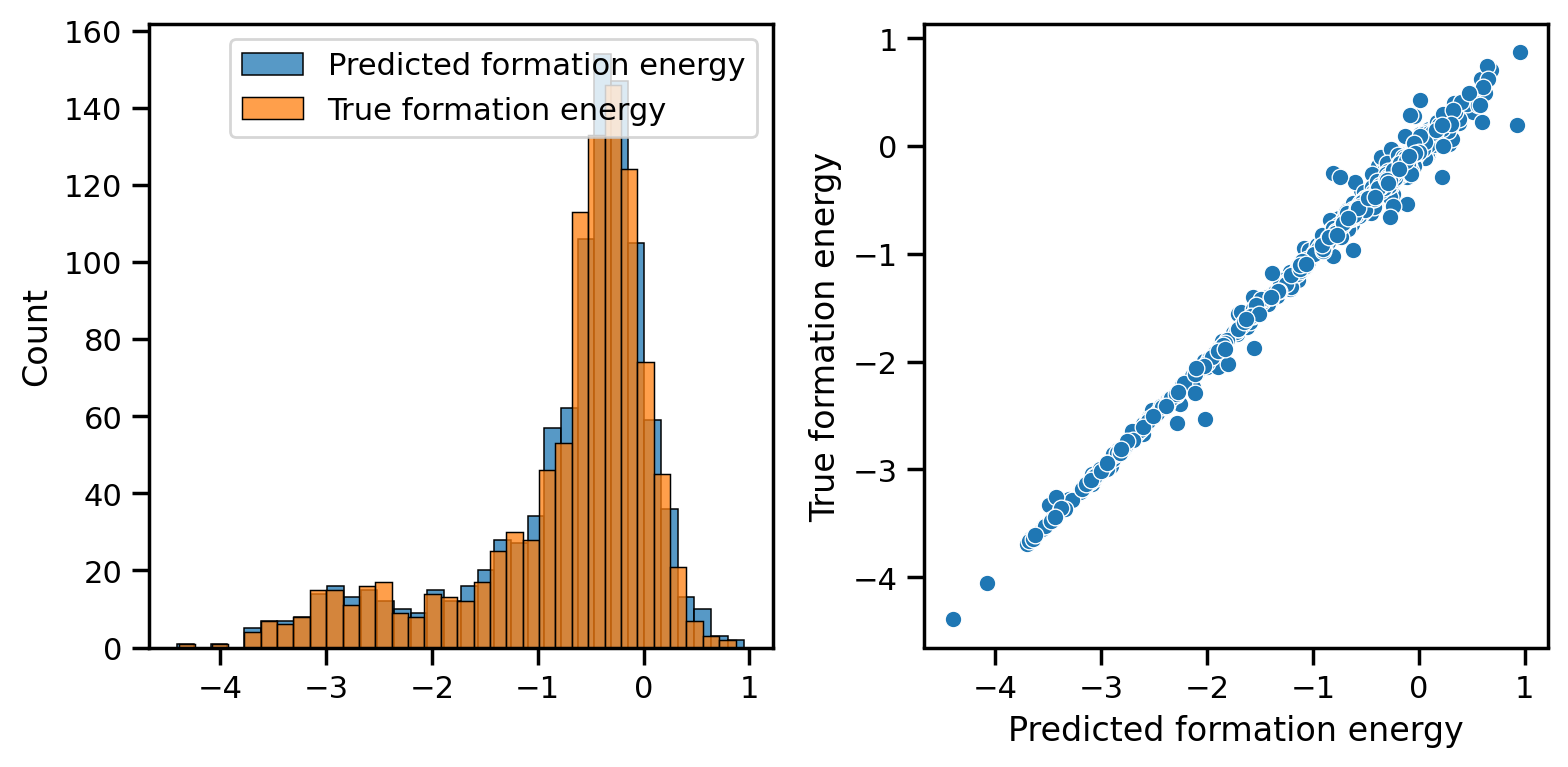

{
    'F1': 0.7719298245614037,
    'DAF': 4.622708618331053,
    'Precision': 0.7764705882352941,
    'Recall': 0.7674418604651163,
    'Accuracy': 0.923828125,
    'TPR': 0.7674418604651163,
    'FPR': 0.04460093896713615,
    'TNR': 0.9553990610328639,
    'FNR': 0.23255813953488372,
    'TP': 132,
    'FP': 38,
    'TN': 814,
    'FN': 40,
    'MAE': 0.04034986399636864,
    'RMSE': 0.07613353655840016,
    'R2': 0.9192250281878888
}

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from matbench_discovery.metrics import stable_metrics

sns.set_context("notebook")

e_form_true, e_form_pred = zip(*preds_targets["e_form"])
e_form_true = np.array(e_form_true)
e_form_pred = np.array(e_form_pred)

e_above_hull_true, e_above_hull_pred = zip(*preds_targets["e_above_hull"])
e_above_hull_true = np.array(e_above_hull_true)
e_above_hull_pred = np.array(e_above_hull_pred)

rich.print(
    {
        "e_form": {"pred": e_form_pred.shape, "true": e_form_true.shape},
        "e_above_hull": {
            "pred": e_above_hull_pred.shape,
            "true": e_above_hull_true.shape,
        },
    }
)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes = axes.flatten()

ax = axes[0]
sns.histplot(e_form_pred, label="Predicted formation energy", ax=ax)
sns.histplot(e_form_true, label="True formation energy", ax=ax)
ax.legend()

ax = axes[1]
sns.scatterplot(y=e_form_true, x=e_form_pred, ax=ax)
ax.set_xlabel("Predicted formation energy")
ax.set_ylabel("True formation energy")

fig.tight_layout()
plt.show()

metrics = stable_metrics(e_above_hull_true, e_above_hull_pred, fillna=False)
rich.print(metrics)

In [11]:
from collections import defaultdict
from functools import partial

import numpy as np
from torch.utils.data import DataLoader
from tqdm.auto import tqdm

config = RelaxerConfig(
    compute_stress=True,
    stress_weight=0.1,
    optimizer="FIRE",
    # fmax=0.01,
    # ase_filter="frechet",
    fmax=0.02,
    ase_filter="exp",
)
relaxer = Relaxer(
    config=config,
    model=partial(model_fn, use_y_relaxed=True),
    collate_fn=model.collate_fn,
    device=model.device,
)

dl = DataLoader(
    dataset,
    batch_size=1,
    collate_fn=model.collate_fn,
    shuffle=False,
    num_workers=0,
    pin_memory=True,
)

preds_targets = defaultdict[str, list[tuple[float, float]]](lambda: [])
mae_error = 0.0
mae_count = 0

for data in tqdm(dl, total=len(dl)):
    data = move_data_to_device(data, model.device)
    relax_out = relaxer.relax(data, verbose=False)

    e_form_true = data.y_formation.item()
    e_form_pred = relax_out.atoms.get_total_energy()
    preds_targets["e_form"].append((e_form_pred, e_form_true))

    e_above_hull_true = data.y_above_hull.item()
    e_above_hull_pred = e_above_hull_true + (e_form_pred - e_form_true)
    preds_targets["e_above_hull"].append((e_above_hull_pred, e_above_hull_true))

    mae_error += abs(e_form_pred - e_form_true)
    mae_count += 1
    mae_running = mae_error / mae_count

    nsteps = len(relax_out.trajectory.frames)

    print(
        f"# Steps: {nsteps}; e_form: P={e_form_pred:.4f}, GT={e_form_true:.4f}, Δ={abs(e_form_pred - e_form_true):.4f}, MAE={mae_running:.4f}"
    )

  0%|          | 0/1024 [00:00<?, ?it/s]

# Steps: 42; e_form: P=-0.8349, GT=-0.8008, Δ=0.0341, MAE=0.0341
# Steps: 60; e_form: P=-0.0307, GT=-0.0220, Δ=0.0087, MAE=0.0214
# Steps: 52; e_form: P=-0.6583, GT=-0.6088, Δ=0.0495, MAE=0.0308
# Steps: 117; e_form: P=-0.2939, GT=-0.1544, Δ=0.1395, MAE=0.0580
# Steps: 64; e_form: P=-0.2949, GT=-0.1154, Δ=0.1795, MAE=0.0823
# Steps: 33; e_form: P=-0.3850, GT=-0.3905, Δ=0.0055, MAE=0.0695
# Steps: 22; e_form: P=-0.2657, GT=-0.2468, Δ=0.0189, MAE=0.0622
# Steps: 13; e_form: P=-0.5057, GT=-0.4542, Δ=0.0515, MAE=0.0609
# Steps: 37; e_form: P=-1.9794, GT=-1.9089, Δ=0.0704, MAE=0.0620
# Steps: 7; e_form: P=-0.1540, GT=-0.1224, Δ=0.0317, MAE=0.0589
# Steps: 23; e_form: P=-1.8685, GT=-1.8781, Δ=0.0097, MAE=0.0545
# Steps: 43; e_form: P=-1.6396, GT=-1.6101, Δ=0.0295, MAE=0.0524
# Steps: 14; e_form: P=-1.8151, GT=-1.8180, Δ=0.0029, MAE=0.0486
# Steps: 22; e_form: P=-0.3445, GT=-0.3333, Δ=0.0112, MAE=0.0459
# Steps: 10; e_form: P=-0.7435, GT=-0.7299, Δ=0.0136, MAE=0.0438
# Steps: 24; e_form: P=-0

{'e_form': {'pred': (1024,), 'true': (1024,)}, 'e_above_hull': {'pred': (1024,), 'true': (1024,)}}

/tmp/ipykernel_427121/3062433637.py:38: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


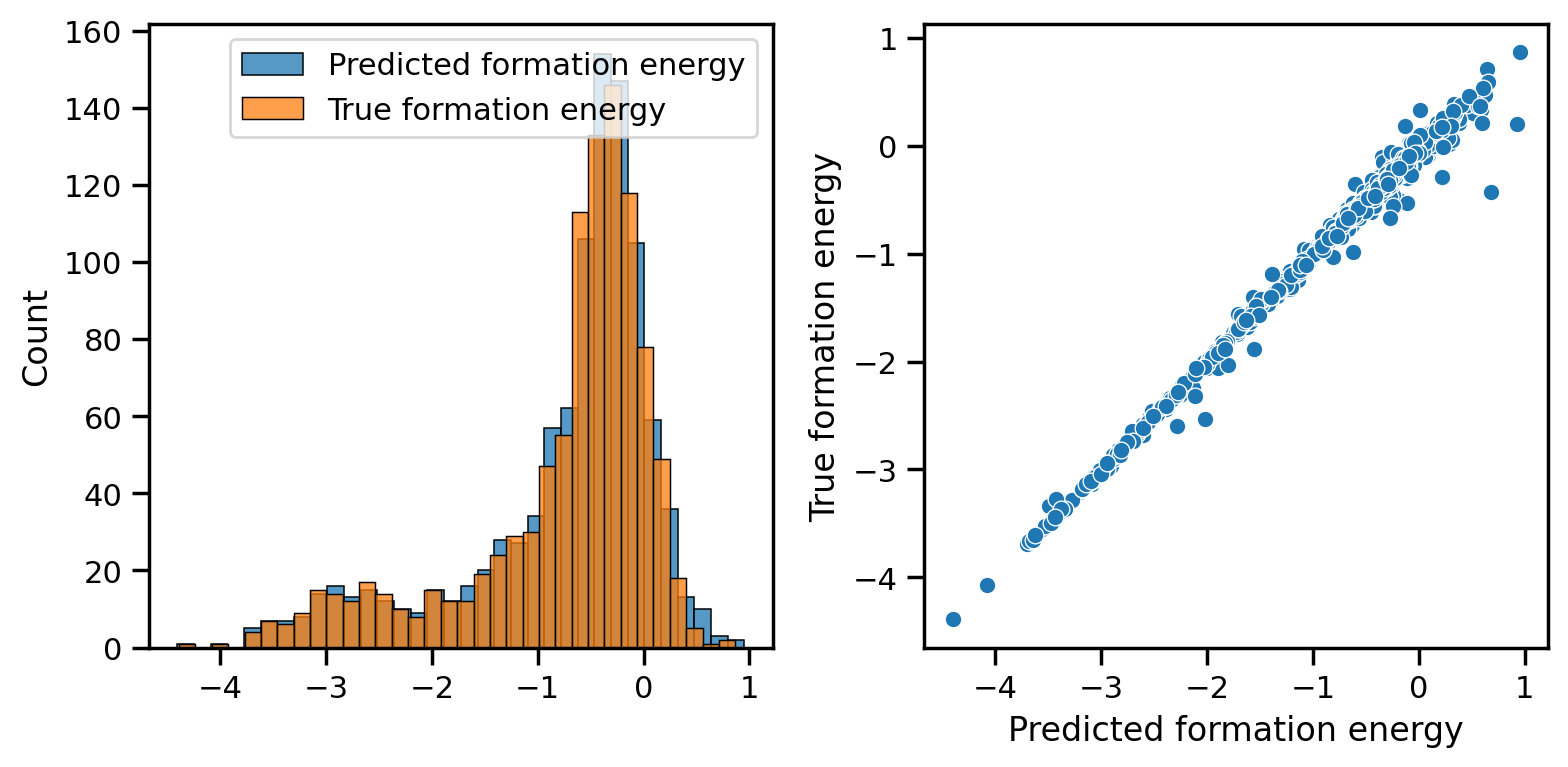

{
    'F1': 0.7704918032786885,
    'DAF': 4.3332533013205285,
    'Precision': 0.8294117647058824,
    'Recall': 0.7193877551020408,
    'Accuracy': 0.91796875,
    'TPR': 0.7193877551020408,
    'FPR': 0.035024154589371984,
    'TNR': 0.964975845410628,
    'FNR': 0.28061224489795916,
    'TP': 141,
    'FP': 29,
    'TN': 799,
    'FN': 55,
    'MAE': 0.04057828605736269,
    'RMSE': 0.07993355139280918,
    'R2': 0.907519753486602
}

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from matbench_discovery.metrics import stable_metrics

sns.set_context("notebook")

e_form_true, e_form_pred = zip(*preds_targets["e_form"])
e_form_true = np.array(e_form_true)
e_form_pred = np.array(e_form_pred)

e_above_hull_true, e_above_hull_pred = zip(*preds_targets["e_above_hull"])
e_above_hull_true = np.array(e_above_hull_true)
e_above_hull_pred = np.array(e_above_hull_pred)

rich.print(
    {
        "e_form": {"pred": e_form_pred.shape, "true": e_form_true.shape},
        "e_above_hull": {
            "pred": e_above_hull_pred.shape,
            "true": e_above_hull_true.shape,
        },
    }
)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes = axes.flatten()

ax = axes[0]
sns.histplot(e_form_pred, label="Predicted formation energy", ax=ax)
sns.histplot(e_form_true, label="True formation energy", ax=ax)
ax.legend()

ax = axes[1]
sns.scatterplot(y=e_form_true, x=e_form_pred, ax=ax)
ax.set_xlabel("Predicted formation energy")
ax.set_ylabel("True formation energy")

fig.tight_layout()
plt.show()

metrics = stable_metrics(e_above_hull_true, e_above_hull_pred, fillna=False)
rich.print(metrics)